# WEEK-2 Assignment(By-Ayush Paul)

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Bank_Dataset

In [2]:
bank_data_full=pd.read_csv('C:/Users/Admin/Desktop/ACM/ML LOC MENTOR/bank-full.csv')
bank_data_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
#Dropping those rows which have a negative value of Balance
X=bank_data_full.loc[bank_data_full.balance>0].copy()

## Exploratory Data Analysis

## A)Analysis on Marital Status

In [21]:
#Getting the number of people with their marital status
bank_data_full.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

* From the barplot below we can observe that the number of **Married people having bank accounts are higher than those of single and divorced people.**
* From these observations we can infer that people who are married **are more cautious about their future financial status than those people who are single.**

Text(0.5, 1.0, 'Count by Marital Status')

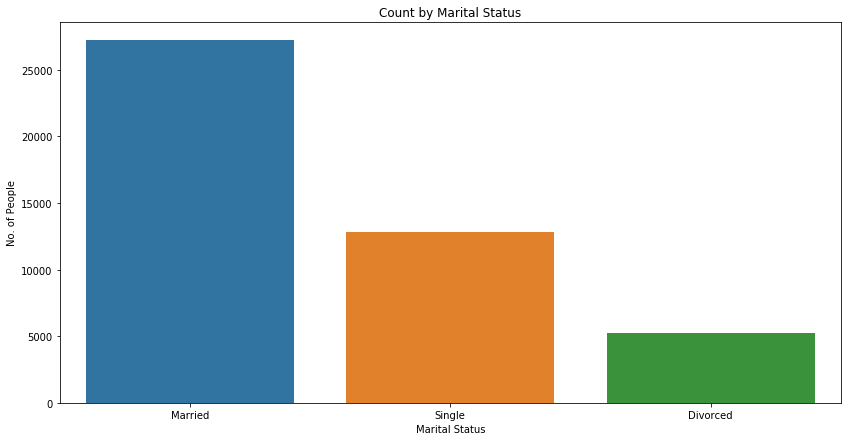

In [34]:
plt.figure(figsize=(14,7))
sns.barplot(x=['Married','Single','Divorced'],y=[27214,12790,5207])
plt.xlabel('Marital Status')
plt.ylabel('No. of People')
plt.title('Count by Marital Status')

In [31]:
marriage_stat=X.groupby('marital').balance.unique()
marriage_stat

marital
divorced    [2, 270, 63, 506, 2586, 989, 59, 91, 1, 164, 1...
married     [2143, 2, 1506, 231, 121, 6, 71, 162, 229, 52,...
single      [29, 1, 447, 593, 390, 13, 23, 255, 265, 243, ...
Name: balance, dtype: object

In [32]:
count_1=[]
for i in range(len(marriage_stat)):
    add=0
    for j in range(len(marriage_stat[i])):
        add=add+marriage_stat[i][j]
    avg= add/len(marriage_stat[i])
    count_1.append(avg)
count_1

[2385.064412238325, 4314.48412541905, 3237.543538038497]

* As shown in the barplot below the **mean bank balance of married people are more than those of single and divorced people.** The main reason for this trend can be attributed due to the larger number of married people having accounts than those of the other categories.

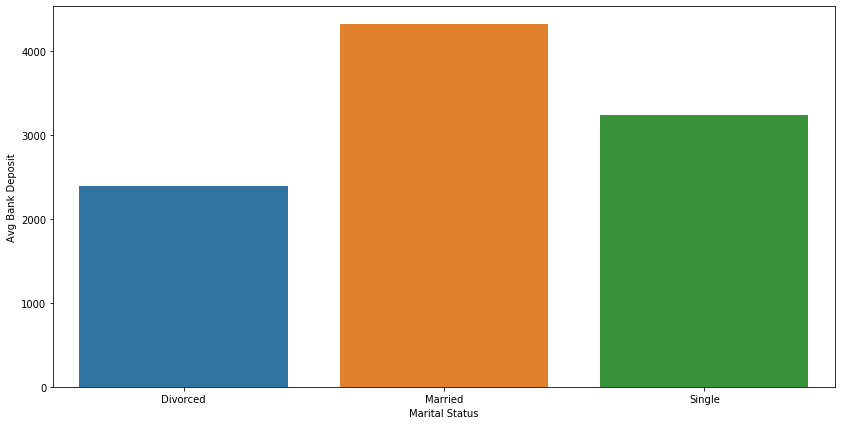

In [33]:
plt.figure(figsize=(14,7))
plt.xlabel("Marital Status")
plt.ylabel("Avg Bank Deposit")
sns.barplot(x=['Divorced','Married','Single'],y=count_1)

## B)Analysis by Education Level

In [23]:
#Getting the number of people with their education Level
bank_data_full.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

* The main takeaway from the below graph is that **people who have higher levels of education know about the benefits of opening a bank account and thus their number is higher.**
* Interesteringly the **no. of people having secondary level of education are more than those who have tertiary knowledge**.It can be because there are a few amount of people who posess tertiary knowledge in our country.

Text(0.5, 1.0, 'No. of Accounts per Education Level')

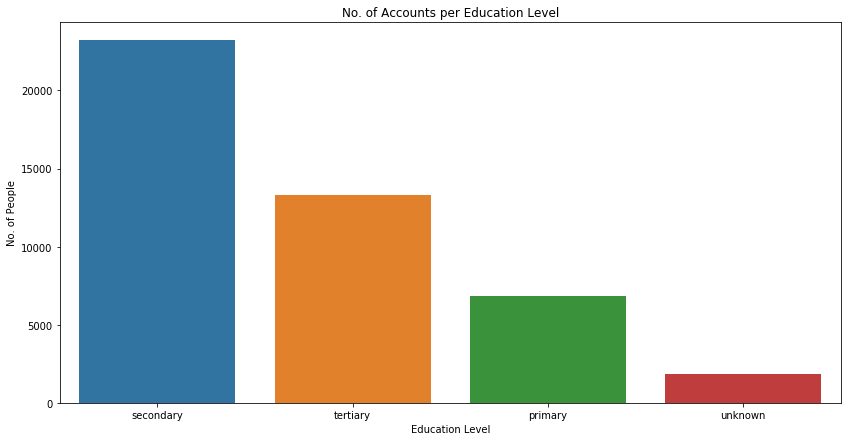

In [24]:
plt.figure(figsize=(14,7))
sns.barplot(x=['secondary','tertiary','primary','unknown'],y=list(bank_data_full.education.value_counts()))
plt.xlabel("Education Level")
plt.ylabel("No. of People")
plt.title("No. of Accounts per Education Level")

## C)Analysis By Occupation

In [26]:
#Getting the number of Jobs
X.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'housemaid', 'unemployed', 'student'], dtype=object)

In [27]:
job_count=X.groupby('job').balance.unique()
job_count

job
admin.           [270, 390, 13, 39, 506, 206, 2343, 45, 290, 61...
blue-collar      [1506, 52, 723, 23, 104, 1291, 306, 24, 249, 1...
entrepreneur     [2, 113, 243, 19, 294, 100, 901, 236, 155, 106...
housemaid        [947, 195, 965, 17, 109, 203, 6920, 98, 365, 8...
management       [2143, 231, 447, 779, 255, 378, 10635, 49, 424...
retired          [121, 229, 60, 529, 96, 100, 486, 81, 30, 216,...
self-employed    [137, 3, 7, 19, 672, 16, 292, 107, 935, 918, 4...
services         [162, 50, 2586, 179, 790, 25, 91, 1, 164, 31, ...
student          [298, 25, 423, 82, 157, 34, 252, 209, 948, 110...
technician       [29, 593, 6, 71, 265, 839, 63, 989, 1205, 1937...
unemployed       [42, 293, 41, 13, 219, 10, 408, 5345, 387, 11,...
unknown          [1, 28, 27, 414, 50, 2398, 106, 3111, 2272, 32...
Name: balance, dtype: object

In [28]:
#Code to get the mean of balance deposited in the bank by occupation
count=[]
for i in range(len(job_count)):
    add=0
    for j in range(len(job_count[i])):
        add=add+job_count[i][j]
    avg= add/len(job_count[i])
    count.append(avg)
count

[2237.6402373247033,
 2583.24881775191,
 2400.1453201970444,
 1988.2185792349726,
 3643.945877109201,
 2713.3273026315787,
 2276.9053905390538,
 1990.5746031746032,
 1648.768115942029,
 2666.298985801217,
 2115.990990990991,
 2156.0616113744077]

* It is clear upon observation that **people having their jobs in the management sector are clearly hiher paid than people who have their jobs as technician,services,self-employed etc.**
* One interesting to note here is that retired people also have their avg bank balance close to people who are currently working.**Most of it is probably their savings which they have accumulated over time.**

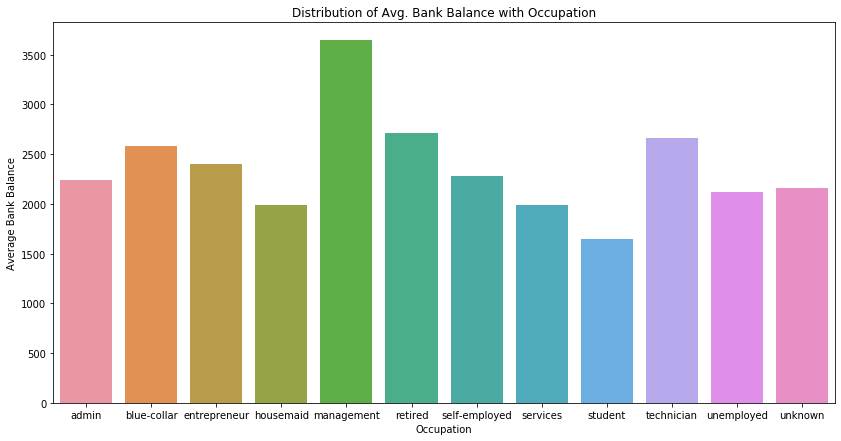

In [29]:
plt.figure(figsize=(14,7))
plt.xlabel("Occupation")
plt.ylabel("Average Bank Balance")
plt.title("Distribution of Avg. Bank Balance with Occupation")
sns.barplot(x=['admin','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'],y=count)

## D) Analysis by Age Groups

* From the following graph we can see that the **number of people between the working age of 30-60 has higer balance whereas people below 25(generally students) have less balance.**
* We also note that **after the age of 60 people retire from their jobs and thus their balance are somewhat lower than those people in the age group of 30-60.**

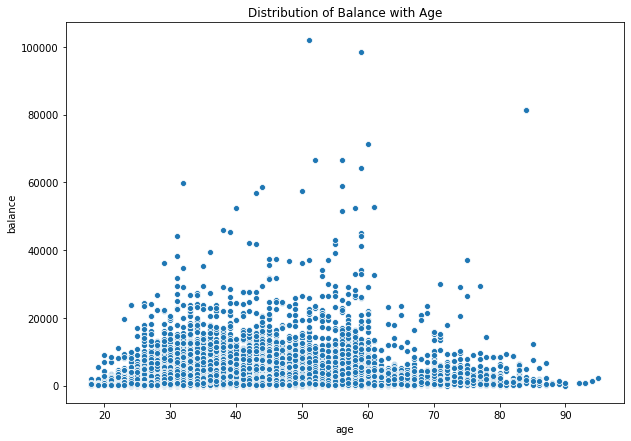

In [62]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Balance with Age")
sns.scatterplot(x=X.age,y=X.balance)

## D)Correlation Matrix

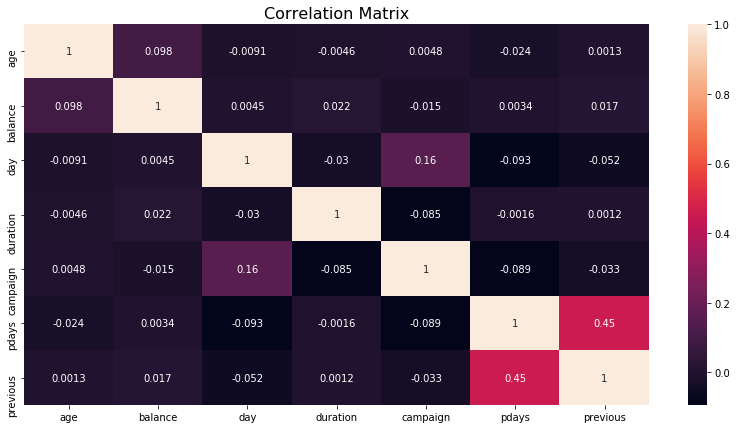

In [30]:
plt.figure(figsize=(14,7))
numeric_df = bank_data_full.select_dtypes(exclude="object")
corr_numeric = numeric_df.corr()
sns.heatmap(corr_numeric, annot=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## CLASSIFICATION MODEL

In [3]:
# Getting the training Data
X_full=bank_data_full.copy()
X_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Function-1

In [96]:
def get_data_splits(X_full_1):
    #Checking to see if the given dataset has or has not the prediction target column
    try: 
        #Dropping the Prediction Target Column
        y=X_full_1.y.copy()
        X_full=X_full_1.drop(columns=['y']).copy()
    except:
        X_full=X_full_1
        
        #Splitting the data into test and validation dataset
        X_train_full,X_test_full=train_test_split(X_full,train_size=0.85)
        #Selecting categorical columns for OneHotEncoding
        categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique()<10 and X_train_full[cname].dtype == "object"]

        #Selecting numerical columns for SimpleImputation
        numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]
        # Keep selected columns only
        my_cols = categorical_cols + numerical_cols

        #Merge the selected columns for the Final Training and Validation DataSet
        X_train = X_train_full[my_cols].copy()
        X_valid = X_test_full[my_cols].copy()
        return X_train,X_valid
    else:
        #Splitting the data into test and validation dataset
        X_train_full,X_test_full,y_train,y_valid=train_test_split(X_full,y,train_size=0.85)
        #Selecting categorical columns for OneHotEncoding
        categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique()<10 and X_train_full[cname].dtype == "object"]

        #Selecting numerical columns for SimpleImputation
        numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]
        # Keep selected columns only
        my_cols = categorical_cols + numerical_cols

        #Merge the selected columns for the Final Training and Validation DataSet
        X_train = X_train_full[my_cols].copy()
        X_valid = X_test_full[my_cols].copy()
        return X_train,X_valid,y_train,y_valid

## Function-2

In [117]:
def train_model(X_train,y_train):
    #Preprocessing for numerical data.Using Simple Imputer to replace 
    #NaN values with the mean value of the particular column
    numerical_transformer = SimpleImputer(strategy='mean')
    # Preprocessing for categorical data.When the OneHotEncoder parameter is set to ‘ignore’ and an 
    #unknown category is encountered during transform, the resulting one-hot encoded 
    #columns for this feature will be all zeros
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    #Selecting categorical columns for OneHotEncoding
    categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique()<10 and X_train[cname].dtype == "object"]

    #Selecting numerical columns for SimpleImputation
    numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64','float64']]
    # Keep selected columns only
    my_cols = categorical_cols + numerical_cols
    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    #Initializing Value of K for KNN Algorithm
    k=int(round(np.sqrt(X_train.shape[0])))
    if k%2==0:
        k=k+1
    #Define Model
    model = KNeighborsClassifier(n_neighbors=k,leaf_size=30)
    # Bundle preprocessing and modeling code in a pipeline
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])
    # Preprocessing of training data, fit model 
    my_pipeline.fit(X_train, y_train)
    return my_pipeline

## Function-3

In [78]:
def predict_model(model,X_valid):
    """ This function takes two parameters --- 1. MODEL 2. X_valid
        It returns an array of predictions. """
    preds=model.predict(X_valid)
    return preds

## Function - 4

In [79]:
def get_model_score(model,preds,X_valid,y_valid):
    cv_scores = cross_val_score(model, X_valid,y_valid, 
                            cv=5,
                            scoring='accuracy')
    matrix=confusion_matrix(y_valid,preds)
    print("Confusion Matrix :") 
    print(confusion_matrix(y_valid,preds)) #Print Confusion Matrix
    print()
    print("Cross-validation accuracy: %f" % cv_scores.mean()) #Print Cross-Validation Score
    group_names = ['True_Pos','True_Neg','False_Pos','False_Neg']
    group_counts = ["{0:0.0f}".format(value) for value in
                    matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         matrix.flatten()/np.sum(matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')  

## Driver Code-1

In [154]:
train_X,valid_X,train_y,valid_y=get_data_splits(X_full)

In [155]:
my_model=train_model(train_X,train_y)
my_model

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']

In [156]:
prediction=predict_model(my_model,valid_X)

In [157]:
prediction

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

Confusion Matrix :
[[5963   66]
 [ 662   91]]

Cross-validation accuracy: 0.888971


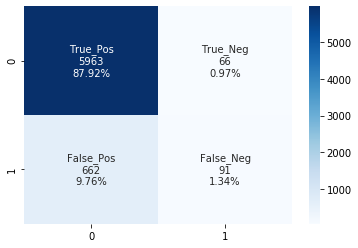

In [158]:
get_model_score(my_model,prediction,valid_X,valid_y)

## Driver Code-2 (To be used during Evaluation)

In [ ]:
#prediction_1=predict_model(my_model,X_test)

In [ ]:
#get_model_score(my_model,prediction_1,X_test,y_test)